In [ ]:
import pandas as pd


data = pd.read_excel("/content/drive/My Drive/crawling/alba_heaven.xls",index_col=[0])

data.head()

,title,area,officehours,pay,recently,link,label
0,대림역 남구로역 월화수목금 4시~7시 간호조무사 구인 초보,서울 구로구,16:00~19:00,"시급10,000",7분전,http://www.alba.co.kr//job/Detail.asp?adid=989...,False
1,【일급15~20만원】 부천배달대행 생각대로 범박옥길지사 기사,경기 부천시,11:00~02:00,"일급180,000",7분전,http://www.alba.co.kr//job/Detail.asp?adid=989...,False
2,"[신라호텔]어반아일랜드 라이프가드 모집/시급8,590원",서울 마포구,09:00~21:00 (로테이션),"시급8,590",8분전,http://www.alba.co.kr//job/Detail.asp?adid=987...,True
3,유일유통] 납품배송직원 모집(영업겸) / 초보가능/ 경력자우,경기 시흥시,08:00~18:00,"월급3,000,000",9분전,http://www.alba.co.kr//job/Detail.asp?adid=983...,False
4,"[신라호텔]어반아일랜드 라이프가드 모집/시급8,590원",서울 동대문구,09:00~21:00 (로테이션),"시급8,590",10분전,http://www.alba.co.kr//job/Detail.asp?adid=987...,True


In [ ]:
!pip install soynlp
!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!pip install gensim
!pip install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.8).
git is already the newest version (1:2.17.1-1ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
f = open("/content/drive/My Drive/crawling/koreanStopwords.txt", 'r')
lines = f.readlines()
stopwords = []
for line in lines:
    line = line.replace('\n', '')
    line = line.replace('\t', '')
    stopwords.append(line)
f.close()
stopwords

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '이',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓']

In [ ]:
from konlpy.tag import Mecab
from gensim.models import Word2Vec


mecab = Mecab()

data2 = data.copy()
stop_word = ["#", "[", "]", "/", ",", "+", "-", "(", ")", "_", "%"] + stopwords
vocab = {}

for i, t in enumerate(data2.title):
    word_token = mecab.morphs(t)
    temp = []
    for w in word_token:
        if w not in stop_word:
            temp.append(w)
            if w not in vocab:
                vocab[w] = 0
            vocab[w] += 1
    data2.title[i] = temp

vocab_sorted = sorted(vocab.items(), key=(lambda x:x[1]), reverse=True)
print(vocab_sorted)
data2.title[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[('모집', 2399), ('야간', 1217), ('주말', 1180), ('만', 1112), ('.', 1034), ('평일', 1032), ('알바', 1001), ('지급', 906), ('단기', 893), ('당일', 851), ('꿀', 825), ('합니다', 801), ('일급', 797), ('재택', 777), ('맨', 773), ('부', 770), ('직원', 755), ('애니', 736), ('가능', 660), ('5', 643), ('배달', 607), ('~', 571), ('시', 538), ('채용', 532), ('에서', 497), ('【', 460), ('근무', 408), ('고', 403), ('】', 390), ('교사', 380), ('1', 373), ('및', 372), ('초보', 360), ('배송', 335), ('대행', 323), ('기사', 321), ('구합니다', 310), ('분', 310), ('사원', 307), ('2', 306), ('을', 301), ('지원', 298), ('센터', 295), ('25', 291), ('주방', 278), ('정규직', 275), ('3', 274), ('는', 274), ('관리', 273), ('실', 272), ('근무자', 264), ('GS', 264), ('매니저', 259), ('님', 242), ('오후', 241), ('상담', 239), ('아르바이트', 233), ('라이더', 228), ('바', 222), ('바로', 210), ('4', 209), ('이상', 205), ('남', 198), ('꼬', 194), ('225', 193), ('아비', 191), ('환영', 189), ('인', 185), ('홀', 185), ('물류', 183), ('함께', 182), ('업무', 179), ('를', 178), ('고객', 176), ('방문', 168), ('공부방', 167), ('주부', 165), ('급구',

['대림역', '남구로역', '월화수', '목금', '4', '시', '~', '7', '시', '간호조무사', '구인', '초보']

In [ ]:
title_list = []
for x in data2.title:
    title_list.append(" ".join(x))
title_list

['대림역 남구로역 월화수 목금 4 시 ~ 7 시 간호조무사 구인 초보',
 '【 일급 15 ~ 20 만 】 부천 배달 대행 대로 범박 옥길 지사 기사',
 '신라호텔 어반 아일랜드 라이프 가드 모집 시급 8 590',
 '유일 유통 납품 배송 직원 모집 영업 겸 초보 가능 경력 자우',
 '신라호텔 어반 아일랜드 라이프 가드 모집 시급 8 590',
 '200 만 5 근무 부동산 컨설턴트 팀장 팀원 모집',
 '신라호텔 어반 아일랜드 라이프 가드 모집 시급 8 590',
 '8 개월 단기 평일 5 SK 앱 개발 연구 센터 리셉션 채용',
 '【 바로 고 상동 지사 】 기본 료 3500 픽 업 반경 300 m 에',
 'TNB 어 드림 상현 지사 에서 라이더 님 구인 합니다',
 '평일 5 증권 금융 사 고객 상담원 TM 채용 영업 X',
 '안녕 세요 Lever bar 최고 혜택 . 보너스 보장 남여 직원 모 집합 니',
 '신라호텔 어반 아일랜드 라이프 가드 모집 시급 8 590',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '여주 쿠팡 여주 만 30 만 추가 지급 사원 대모 장기 근무',
 '병원 단기 아르바이트 방문자 출입 관리 업무 모집',
 '고색동 쌍용 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cv = CountVectorizer()
cv.fit(title_list)
print(cv.vocabulary_)
data_x = cv.transform(title_list).toarray()

{'대림역': 1011, '남구로역': 833, '월화수': 2797, '목금': 1417, '간호조무사': 386, '구인': 687, '초보': 3499, '일급': 2977, '15': 33, '20': 55, '부천': 1701, '배달': 1555, '대행': 1045, '대로': 1005, '범박': 1598, '옥길': 2662, '지사': 3354, '기사': 771, '신라호텔': 2304, '어반': 2503, '아일랜드': 2412, '라이프': 1205, '가드': 339, '모집': 1412, '시급': 2247, '590': 158, '유일': 2838, '유통': 2850, '납품': 858, '배송': 1558, '직원': 3381, '영업': 2612, '가능': 337, '경력': 482, '자우': 3053, '200': 56, '근무': 731, '부동산': 1678, '컨설턴트': 3583, '팀장': 3748, '팀원': 3747, '개월': 437, '단기': 961, '평일': 3802, 'sk': 296, '개발': 433, '연구': 2580, '센터': 2064, '리셉션': 1269, '채용': 3439, '바로': 1496, '상동': 1872, '기본': 767, '3500': 120, '반경': 1515, '300': 104, 'tnb': 313, '드림': 1166, '상현': 1903, '에서': 2534, '라이더': 1202, '합니다': 3952, '증권': 3336, '금융': 743, '고객': 515, '상담원': 1870, 'tm': 312, '안녕': 2425, '세요': 2049, 'lever': 256, 'bar': 195, '최고': 3508, '혜택': 4009, '보너스': 1627, '보장': 1641, '남여': 847, '집합': 3409, '여주': 2568, '쿠팡': 3619, '30': 103, '추가': 3517, '지급': 3347, '사원': 1813, '대모'

In [ ]:
train_x = data_x[:4056]
val_x = data_x[4056:5412]
test_x = data_x[5112:]

In [ ]:
data_y = data.label.astype(int)
train_y = data_y[:4056]
val_y = data_y[4056:5412]
test_y = data_y[5112:]

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=30, batch_size=512,
                    validation_data=(val_x, val_y))
result = model.evaluate(test_x, test_y)

Epoch 1/30
8/8 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 0.4352 - val_loss: 0.0000e+00 - val_accuracy: 0.4860
Epoch 2/30
8/8 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4352 - val_loss: 0.0000e+00 - val_accuracy: 0.4860
Epoch 3/30
8/8 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4352 - val_loss: 0.0000e+00 - val_accuracy: 0.4860
Epoch 4/30
8/8 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4352 - val_loss: 0.0000e+00 - val_accuracy: 0.4860
Epoch 5/30
8/8 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4352 - val_loss: 0.0000e+00 - val_accuracy: 0.4860
Epoch 6/30
8/8 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4352 - val_loss: 0.0000e+00 - val_accuracy: 0.4860
Epoch 7/30
8/8 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4352 - val_loss: 0.000

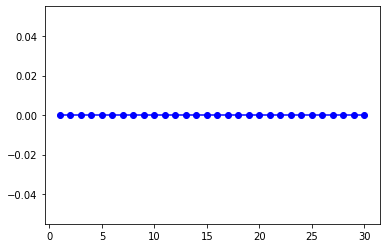

In [ ]:
import matplotlib.pyplot as plt


loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="train loss")
plt.plot(epochs, val_loss, "b", label="val loss")
plt.show()